## Import packages

In [1]:
import theano
import theano.tensor as T
import numpy as np
import matplotlib.pyplot as plt


%pylab inline
floatX = theano.config.floatX

Populating the interactive namespace from numpy and matplotlib


Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN 5103)


## Make dataset, initialize parameters

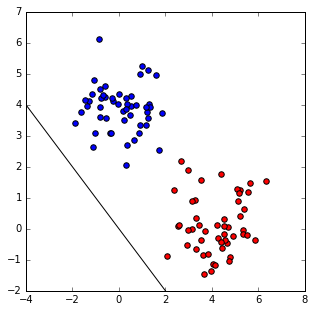

In [7]:
n_data = 50
data1 = np.random.multivariate_normal([4,0], [[1,0],[0,1]], n_data)
data2 = np.random.multivariate_normal([0,4], [[1,0],[0,1]], n_data)
data_x = np.vstack([data1,data2])
data_y = np.hstack([np.ones((n_data,)), -np.ones((n_data,))])
shared_x = theano.shared(np.asarray(data_x, dtype=floatX), name='x')
shared_y = theano.shared(np.asarray(data_y, dtype=floatX), name='y')

w = theano.shared(np.ones((2,1), dtype=floatX), name='w')
b = theano.shared(np.zeros((1,), dtype=floatX), name='b')

def draw_state():
    plt.rcParams['figure.figsize']=(5,5)
    plt.scatter(data1[:,0],data1[:,1],30,'r')
    plt.scatter(data2[:,0],data2[:,1],30,'b')
    [x1min,x1max,x2min,x2max] = plt.axis()
    x1val = np.arange(x1min,x1max,0.1)
    wval = w.get_value(borrow=True)
    bval = b.get_value(borrow=True)
    plt.plot(x1val, -(wval[0]*x1val+bval)/wval[1], 'k')
    plt.axis([x1min,x1max,x2min,x2max])
    plt.show()
    
draw_state()

## Build logistic regression model
###$$P(y_i|x_i;w,b) = \frac{1}{1+exp(-(wx_i+b)y_i)}$$
###$$\mathcal{L}(w,b) = -\frac{1}{n}\sum_{i=1}^n log(P(y_i|x_i;w,b))$$###

In [8]:
x = T.matrix('x')
y = T.vector('y')
p_y = 1/(1+T.exp(-(T.dot(x, w)+b)*T.reshape(y,(-1,1))))
loss = T.mean(-T.log(p_y)) + 0.01*w.norm(2)

## Gradient Descent Learning

In [9]:
wgrad = T.grad(loss, w)
bgrad = T.grad(loss, b)
lr = 0.1

train = theano.function([], loss, givens=[(x,shared_x), (y,shared_y)], updates=[(w,w-lr*wgrad), (b,b-lr*bgrad)])

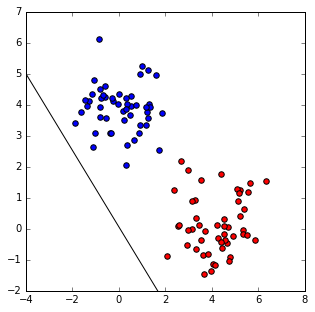

loss: 2.02088618279, w norm: 1.28685474396


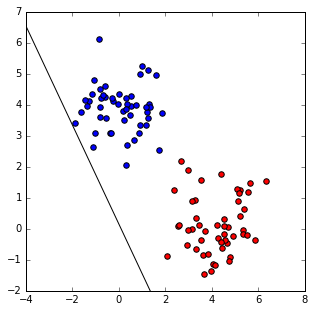

loss: 1.64166879654, w norm: 1.17870163918


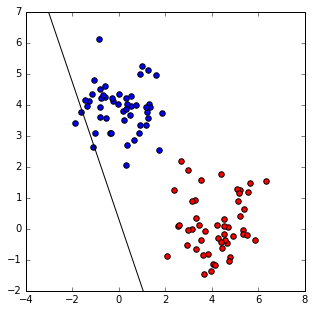

loss: 1.28989970684, w norm: 1.09385085106


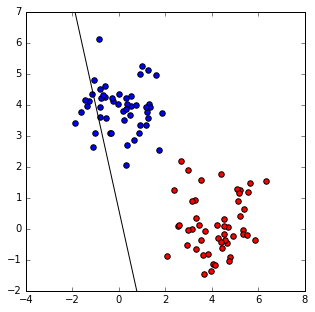

loss: 0.98202329874, w norm: 1.03410947323


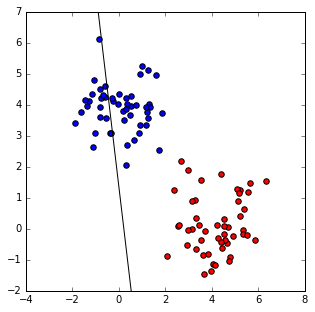

loss: 0.73311829567, w norm: 0.997421443462


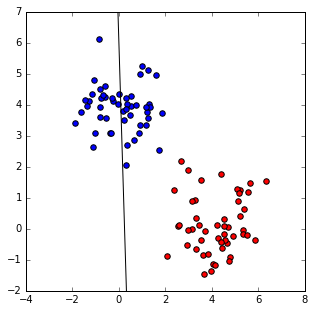

loss: 0.547820210457, w norm: 0.97869759798


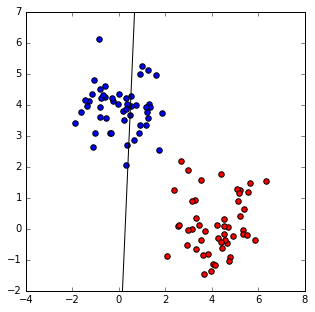

loss: 0.417782396078, w norm: 0.972332537174


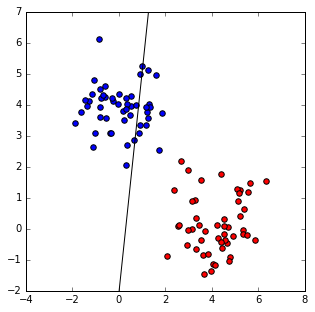

loss: 0.328704535961, w norm: 0.973854601383


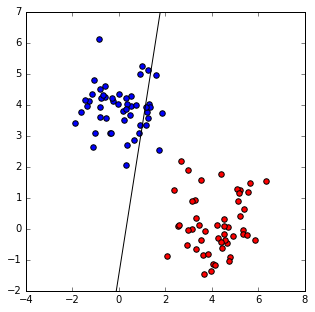

loss: 0.267520159483, w norm: 0.980195641518


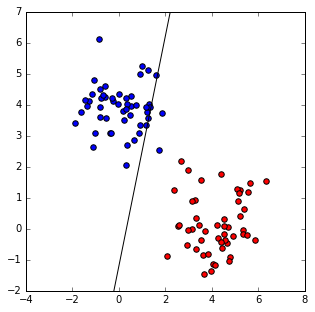

loss: 0.224737137556, w norm: 0.989395558834


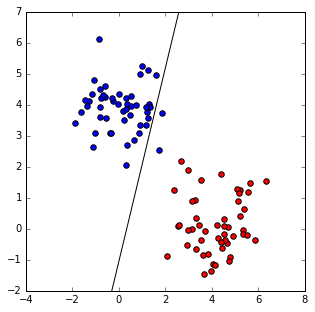

loss: 0.194067507982, w norm: 1.00024342537


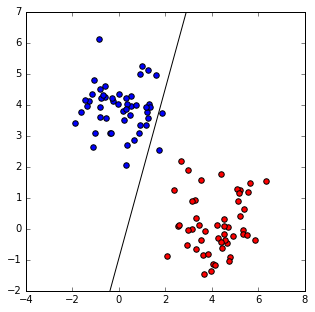

loss: 0.17148219049, w norm: 1.01200008392


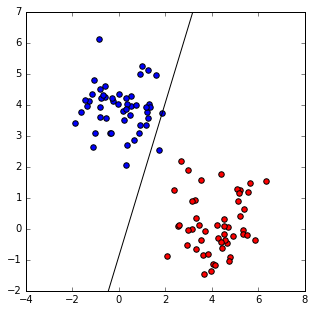

loss: 0.154409229755, w norm: 1.0242139101


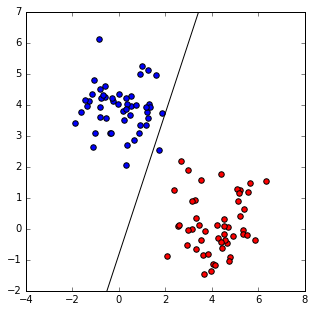

loss: 0.141187265515, w norm: 1.03660726547


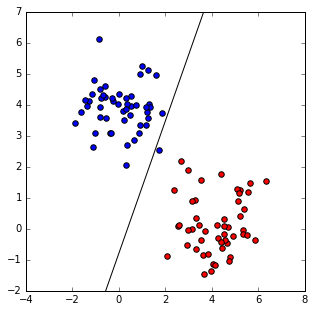

loss: 0.130721926689, w norm: 1.04900860786


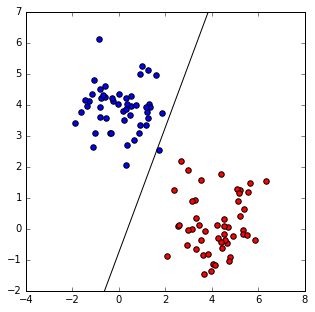

loss: 0.12227576226, w norm: 1.06131184101


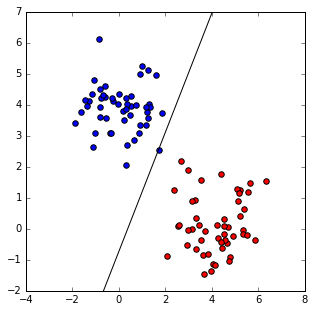

loss: 0.115340337157, w norm: 1.07345175743


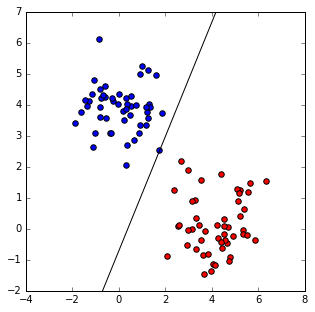

loss: 0.109557151794, w norm: 1.08538889885


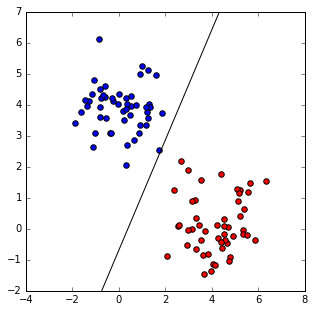

loss: 0.104668155313, w norm: 1.09710049629


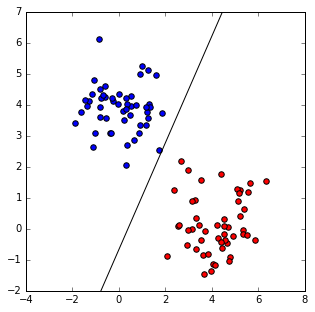

loss: 0.100484102964, w norm: 1.10857474804


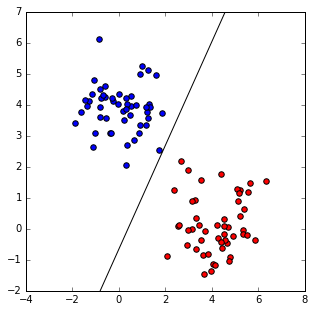

loss: 0.096863694489, w norm: 1.1198066473


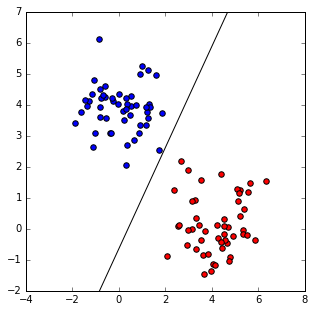

loss: 0.0936997458339, w norm: 1.13079583645


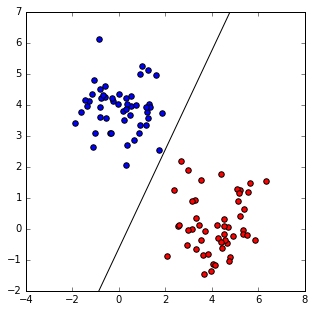

loss: 0.0909098610282, w norm: 1.14154529572


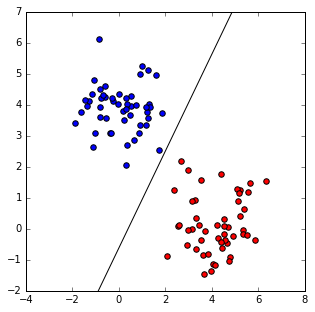

loss: 0.0884297639132, w norm: 1.15205943584


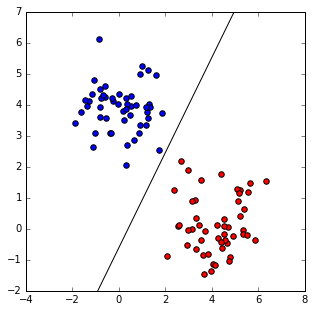

loss: 0.0862087905407, w norm: 1.16234433651


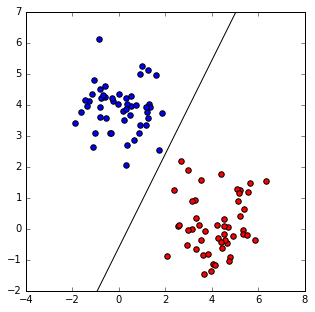

loss: 0.0842064842582, w norm: 1.1724063158


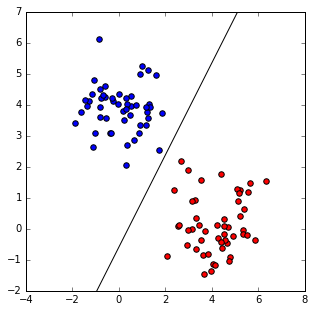

loss: 0.0823902785778, w norm: 1.18225252628


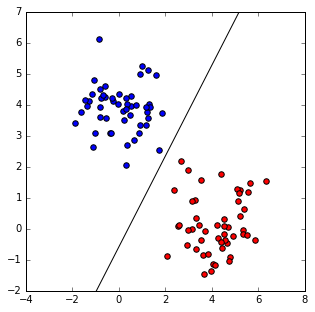

loss: 0.080733679235, w norm: 1.19189012051


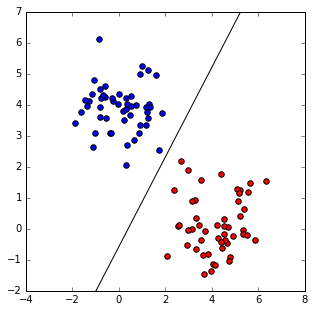

loss: 0.0792149677873, w norm: 1.20132613182


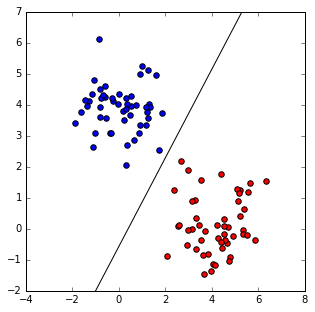

loss: 0.0778161510825, w norm: 1.21056747437


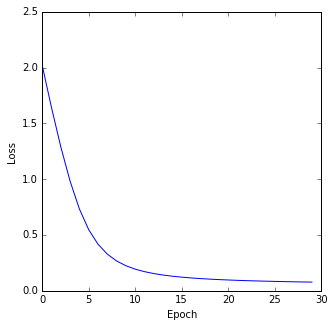

In [10]:
loss_history = []
for epoch in xrange(30):
    loss_val = train()
    loss_history.append(loss_val)
    draw_state()
    print('loss: {}, w norm: {}'.format(loss_val, np.sqrt(np.sum(w.get_value()**2))))
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()